# **Data Mining - Class Assignment W05 (Model Perfomance)**
### Howie Homan - 0706022310040

In [25]:
# === Library Setup ===
# Visualization and analysis tools
import matplotlib.pyplot as plt
import seaborn as sns

# Data handling and computation
import pandas as pd
import numpy as np

# Machine learning modules from sklearn
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report, f1_score
from sklearn import tree

Step 1 — Import and Preview Dataset

In [26]:
# --- Step 1: Load the dataset ---
import pandas as pd

# Show all columns when displaying DataFrames
pd.set_option('display.max_columns', None)

# Dataset source URL (HR Employee Attrition)
data_url = "https://raw.githubusercontent.com/NathaliaMinoque/datasets/refs/heads/main/exercise_employee_attrition.csv"

# Read CSV into DataFrame
df = pd.read_csv(data_url)

# Preview the first few records
df.head()


,Employee_ID,Age,Gender,Marital_Status,Department,Job_Role,Job_Level,Monthly_Income,Hourly_Rate,Years_at_Company,Years_in_Current_Role,Years_Since_Last_Promotion,Work_Life_Balance,Job_Satisfaction,Performance_Rating,Training_Hours_Last_Year,Overtime,Project_Count,Average_Hours_Worked_Per_Week,Absenteeism,Work_Environment_Satisfaction,Relationship_with_Manager,Job_Involvement,Distance_From_Home,Number_of_Companies_Worked,Attrition
0,1,58,Female,Married,IT,Manager,1,15488,28,15,4,2,1,3,4,14,No,6,54,17,4,4,4,20,3,No
1,2,48,Female,Married,Sales,Assistant,5,13079,28,6,9,1,2,1,1,6,Yes,2,45,1,4,1,2,25,2,No
2,3,34,Male,Married,Marketing,Assistant,1,13744,24,24,14,8,3,2,1,77,Yes,6,34,2,3,4,4,45,3,No
3,4,27,Female,Divorced,Marketing,Manager,1,6809,26,10,8,2,3,5,4,49,No,9,48,18,2,3,1,35,3,No
4,5,40,Male,Divorced,Marketing,Executive,1,10206,52,29,10,1,2,5,1,64,No,3,33,0,4,1,3,44,3,No


In [27]:
# Get info from dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 26 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   Employee_ID                    1000 non-null   int64 
 1   Age                            1000 non-null   int64 
 2   Gender                         1000 non-null   object
 3   Marital_Status                 1000 non-null   object
 4   Department                     1000 non-null   object
 5   Job_Role                       1000 non-null   object
 6   Job_Level                      1000 non-null   int64 
 7   Monthly_Income                 1000 non-null   int64 
 8   Hourly_Rate                    1000 non-null   int64 
 9   Years_at_Company               1000 non-null   int64 
 10  Years_in_Current_Role          1000 non-null   int64 
 11  Years_Since_Last_Promotion     1000 non-null   int64 
 12  Work_Life_Balance              1000 non-null   int64 
 13  Job_

In [28]:
# Check for missing values in each columns
df.isnull().sum()

,0
Employee_ID,0
Age,0
Gender,0
Marital_Status,0
Department,0
Job_Role,0
Job_Level,0
Monthly_Income,0
Hourly_Rate,0
Years_at_Company,0


Step 2 — View Dataset Summary Statistics

In [29]:
# --- Step 2: Explore dataset statistics ---
# Generate summary statistics for all numeric columns
df.describe()


,Employee_ID,Age,Job_Level,Monthly_Income,Hourly_Rate,Years_at_Company,Years_in_Current_Role,Years_Since_Last_Promotion,Work_Life_Balance,Job_Satisfaction,Performance_Rating,Training_Hours_Last_Year,Project_Count,Average_Hours_Worked_Per_Week,Absenteeism,Work_Environment_Satisfaction,Relationship_with_Manager,Job_Involvement,Distance_From_Home,Number_of_Companies_Worked
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,500.500000,39.991000,3.055000,11499.899000,57.837000,14.922000,7.539000,4.40800,2.495000,3.151000,2.52700,50.043000,4.877000,44.553000,9.524000,2.494000,2.519000,2.503000,24.507000,2.484000
std,288.819436,11.780055,1.399977,4920.529231,24.702037,8.350548,4.001061,2.99508,1.105077,1.426967,1.13073,28.204657,2.546833,8.704192,5.973534,1.110494,1.106736,1.099636,14.138099,1.111296
min,1.000000,20.000000,1.000000,3001.000000,15.000000,1.000000,1.000000,0.00000,1.000000,1.000000,1.00000,0.000000,1.000000,30.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,250.750000,30.000000,2.000000,7395.750000,36.000000,8.000000,4.000000,2.00000,2.000000,2.000000,2.00000,26.000000,3.000000,37.000000,4.000000,2.000000,2.000000,2.000000,12.000000,1.000000
50%,500.500000,41.000000,3.000000,11256.000000,58.000000,15.000000,8.000000,4.00000,3.000000,3.000000,3.00000,50.000000,5.000000,45.000000,9.000000,2.000000,3.000000,3.000000,24.000000,2.000000
75%,750.250000,50.250000,4.000000,15855.000000,80.000000,22.000000,11.000000,7.00000,3.000000,4.000000,4.00000,75.250000,7.000000,52.000000,15.000000,4.000000,4.000000,3.000000,37.000000,3.000000
max,1000.000000,59.000000,5.000000,19999.000000,99.000000,29.000000,14.000000,9.00000,4.000000,5.000000,4.00000,99.000000,9.000000,59.000000,19.000000,4.000000,4.000000,4.000000,49.000000,4.000000


Step 3 — Check Unique Values in Each Column

In [30]:
# --- Step 3: Identify unique entries per column ---
# Create a dictionary containing each column's unique values
unique_entries = {column: df[column].unique() for column in df.columns}

# Display the dictionary of unique values
display(unique_entries)


{'Employee_ID': array([   1,    2,    3,    4,    5,    6,    7,    8,    9,   10,   11,
          12,   13,   14,   15,   16,   17,   18,   19,   20,   21,   22,
          23,   24,   25,   26,   27,   28,   29,   30,   31,   32,   33,
          34,   35,   36,   37,   38,   39,   40,   41,   42,   43,   44,
          45,   46,   47,   48,   49,   50,   51,   52,   53,   54,   55,
          56,   57,   58,   59,   60,   61,   62,   63,   64,   65,   66,
          67,   68,   69,   70,   71,   72,   73,   74,   75,   76,   77,
          78,   79,   80,   81,   82,   83,   84,   85,   86,   87,   88,
          89,   90,   91,   92,   93,   94,   95,   96,   97,   98,   99,
         100,  101,  102,  103,  104,  105,  106,  107,  108,  109,  110,
         111,  112,  113,  114,  115,  116,  117,  118,  119,  120,  121,
         122,  123,  124,  125,  126,  127,  128,  129,  130,  131,  132,
         133,  134,  135,  136,  137,  138,  139,  140,  141,  142,  143,
         144,  145,  14

Step 4 — Drop Identifier Columns

Removing any unique ID columns prevents data leakage, since these identifiers don’t contribute to prediction and can bias the model.

In [31]:
# --- Step 4: Remove unique identifier column ---
# Employee_ID only serves as an identifier, not a useful feature for prediction
df.drop(columns=['Employee_ID'], inplace=True)

# Verify the remaining columns and data types
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 25 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   Age                            1000 non-null   int64 
 1   Gender                         1000 non-null   object
 2   Marital_Status                 1000 non-null   object
 3   Department                     1000 non-null   object
 4   Job_Role                       1000 non-null   object
 5   Job_Level                      1000 non-null   int64 
 6   Monthly_Income                 1000 non-null   int64 
 7   Hourly_Rate                    1000 non-null   int64 
 8   Years_at_Company               1000 non-null   int64 
 9   Years_in_Current_Role          1000 non-null   int64 
 10  Years_Since_Last_Promotion     1000 non-null   int64 
 11  Work_Life_Balance              1000 non-null   int64 
 12  Job_Satisfaction               1000 non-null   int64 
 13  Perf

Step 5 — Visualize Attrition Distribution

Understanding the class balance helps reveal whether the dataset is imbalanced.
Here we visualize how many employees stayed versus those who left (Attrition = Yes).

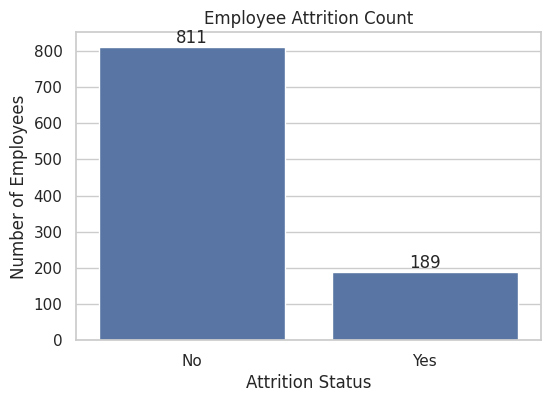

In [32]:
# --- Step 5: Plot attrition class distribution ---
plt.figure(figsize=(6,4))
attrition_plot = sns.countplot(x='Attrition', data=df)
plt.title('Employee Attrition Count')

# Display value labels on each bar
for bar in attrition_plot.containers:
    attrition_plot.bar_label(bar)

plt.xlabel('Attrition Status')
plt.ylabel('Number of Employees')
plt.show()


Step 6 — Data Encoding

Before modeling, categorical variables must be converted into numerical values so that the Decision Tree can interpret them.
We use binary mapping for yes/no and gender-type columns, and ordinal encoding for multi-category fields like departments and job roles.

In [33]:
# --- Step 6: Duplicate DataFrame for Encoding ---
df_encoded = df.copy()

# Import encoders
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder

# 1️⃣ Manual Binary Mapping (One-Hot Style)
# Columns: Attrition, Gender, Overtime
# Convert string values into binary integers
binary_map = {
    'Attrition': {'No': 0, 'Yes': 1},
    'Gender': {'Female': 0, 'Male': 1},
    'Overtime': {'No': 0, 'Yes': 1}
}

for column, mapping in binary_map.items():
    df_encoded[column] = df_encoded[column].map(mapping)

# 2️⃣ Ordinal Encoding for Nominal Variables
# Columns with multiple categories
nominal_columns = ['Department', 'Job_Role', 'Marital_Status']

ordinal_encoder = OrdinalEncoder()
df_encoded[nominal_columns] = ordinal_encoder.fit_transform(df_encoded[nominal_columns])

# Create a readable mapping dictionary for reference
encoding_summary = {}
for col_name, categories in zip(nominal_columns, ordinal_encoder.categories_):
    encoding_summary[col_name] = {category: int(index) for index, category in enumerate(categories)}

# Display encoding dictionary neatly
import pprint
pprint.pprint(encoding_summary)

# Show random 5 samples to verify transformation
df_encoded.sample(n=5)


{'Department': {'Finance': 0, 'HR': 1, 'IT': 2, 'Marketing': 3, 'Sales': 4},
 'Job_Role': {'Analyst': 0, 'Assistant': 1, 'Executive': 2, 'Manager': 3},
 'Marital_Status': {'Divorced': 0, 'Married': 1, 'Single': 2}}


,Age,Gender,Marital_Status,Department,Job_Role,Job_Level,Monthly_Income,Hourly_Rate,Years_at_Company,Years_in_Current_Role,Years_Since_Last_Promotion,Work_Life_Balance,Job_Satisfaction,Performance_Rating,Training_Hours_Last_Year,Overtime,Project_Count,Average_Hours_Worked_Per_Week,Absenteeism,Work_Environment_Satisfaction,Relationship_with_Manager,Job_Involvement,Distance_From_Home,Number_of_Companies_Worked,Attrition
521,31,0,1.0,0.0,3.0,2,10601,36,9,2,5,4,3,3,31,1,2,34,10,2,1,4,34,1,0
737,41,0,0.0,4.0,0.0,3,3240,42,23,13,3,3,1,4,86,1,7,51,12,4,1,3,20,4,0
740,20,1,2.0,2.0,2.0,2,14694,57,7,2,0,2,4,4,23,1,8,30,16,4,1,1,12,2,0
660,23,1,0.0,2.0,3.0,3,4505,37,26,12,9,2,3,1,35,1,9,40,19,1,4,2,36,4,0
411,42,0,0.0,1.0,1.0,3,8585,91,1,9,2,4,3,1,10,1,7,57,11,3,3,4,35,3,1


Step 7 — Validate Encoding Consistency

After performing encoding, it’s useful to confirm that the transformed values in df_encoded correctly represent the original categorical data.
Here we’ll check the same employee row before and after encoding.

In [34]:
# --- Step 7: Verify encoding by comparing one record ---
# Display the selected record from the original dataset
print("🟦 Original Row (Before Encoding):")
display(df.loc[888])

# Display the same record from the encoded dataset
print("\n🟩 Encoded Row (After Encoding):")
display(df_encoded.loc[888])


🟦 Original Row (Before Encoding):


,888
Age,54
Gender,Female
Marital_Status,Married
Department,Sales
Job_Role,Manager
Job_Level,5
Monthly_Income,6085
Hourly_Rate,29
Years_at_Company,3
Years_in_Current_Role,10



🟩 Encoded Row (After Encoding):


,888
Age,54.0
Gender,0.0
Marital_Status,1.0
Department,4.0
Job_Role,3.0
Job_Level,5.0
Monthly_Income,6085.0
Hourly_Rate,29.0
Years_at_Company,3.0
Years_in_Current_Role,10.0


Step 8 — Split Dataset into Features and Target

To train the model, we separate the dataset into:

X (features): all independent variables used for prediction

y (target): the dependent variable (Attrition) we aim to predict

In [35]:
# --- Step 8: Separate features and target variable ---

# X = all predictor columns
# y = target column (Attrition)
X = df_encoded.drop(columns=['Attrition'])
y = df_encoded['Attrition']

# Display shapes to confirm correct separation
print("Shape of X:", X.shape)
print("Shape of y:", y.shape)


Shape of X: (1000, 24)
Shape of y: (1000,)


In [36]:
X.head()

,Age,Gender,Marital_Status,Department,Job_Role,Job_Level,Monthly_Income,Hourly_Rate,Years_at_Company,Years_in_Current_Role,Years_Since_Last_Promotion,Work_Life_Balance,Job_Satisfaction,Performance_Rating,Training_Hours_Last_Year,Overtime,Project_Count,Average_Hours_Worked_Per_Week,Absenteeism,Work_Environment_Satisfaction,Relationship_with_Manager,Job_Involvement,Distance_From_Home,Number_of_Companies_Worked
0,58,0,1.0,2.0,3.0,1,15488,28,15,4,2,1,3,4,14,0,6,54,17,4,4,4,20,3
1,48,0,1.0,4.0,1.0,5,13079,28,6,9,1,2,1,1,6,1,2,45,1,4,1,2,25,2
2,34,1,1.0,3.0,1.0,1,13744,24,24,14,8,3,2,1,77,1,6,34,2,3,4,4,45,3
3,27,0,0.0,3.0,3.0,1,6809,26,10,8,2,3,5,4,49,0,9,48,18,2,3,1,35,3
4,40,1,0.0,3.0,2.0,1,10206,52,29,10,1,2,5,1,64,0,3,33,0,4,1,3,44,3


In [37]:
y.head()

,Attrition
0,0
1,0
2,0
3,0
4,0


Step 9 — Train-Test Split

To evaluate model performance, we divide the dataset into training and testing subsets:

Training set (70%): used to build and train the model

Testing set (30%): used to test model accuracy on unseen data
The stratify option ensures the Attrition class ratio stays consistent across both sets.

In [38]:
# --- Step 9: Divide data into training and testing sets ---
from sklearn.model_selection import train_test_split

# Perform stratified split to maintain class balance
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.3,        # 30% for testing, 70% for training
    random_state=0,       # ensures reproducibility
    stratify=y            # keeps same class distribution
)

# Confirm the resulting dataset shapes
print("X_train shape:", X_train.shape)
print("X_test shape :", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape :", y_test.shape)


X_train shape: (700, 24)
X_test shape : (300, 24)
y_train shape: (700,)
y_test shape : (300,)


In [39]:
X_train.head()

,Age,Gender,Marital_Status,Department,Job_Role,Job_Level,Monthly_Income,Hourly_Rate,Years_at_Company,Years_in_Current_Role,Years_Since_Last_Promotion,Work_Life_Balance,Job_Satisfaction,Performance_Rating,Training_Hours_Last_Year,Overtime,Project_Count,Average_Hours_Worked_Per_Week,Absenteeism,Work_Environment_Satisfaction,Relationship_with_Manager,Job_Involvement,Distance_From_Home,Number_of_Companies_Worked
527,32,0,0.0,3.0,0.0,4,14110,69,27,10,4,4,5,2,51,0,9,36,15,4,1,3,7,1
406,58,0,0.0,3.0,2.0,2,3490,58,26,4,0,4,4,3,11,0,9,54,18,1,3,1,15,1
111,33,1,2.0,4.0,1.0,3,10130,24,10,3,5,1,2,1,94,1,1,56,15,3,1,1,16,3
684,30,0,2.0,1.0,1.0,5,13364,68,21,1,0,3,3,1,78,1,7,40,8,4,2,2,17,4
682,33,0,2.0,1.0,2.0,2,10299,96,12,14,6,2,3,4,12,0,1,58,6,2,2,1,3,1


In [40]:
X_test.head()

,Age,Gender,Marital_Status,Department,Job_Role,Job_Level,Monthly_Income,Hourly_Rate,Years_at_Company,Years_in_Current_Role,Years_Since_Last_Promotion,Work_Life_Balance,Job_Satisfaction,Performance_Rating,Training_Hours_Last_Year,Overtime,Project_Count,Average_Hours_Worked_Per_Week,Absenteeism,Work_Environment_Satisfaction,Relationship_with_Manager,Job_Involvement,Distance_From_Home,Number_of_Companies_Worked
281,53,1,2.0,4.0,3.0,1,15466,45,28,3,5,1,4,3,12,1,3,40,3,3,3,4,28,4
29,34,0,1.0,0.0,2.0,2,16667,25,25,6,2,3,2,3,89,1,1,48,1,4,4,4,29,4
462,55,0,0.0,1.0,2.0,1,4462,89,18,2,0,1,1,4,64,1,1,56,19,2,3,4,3,4
216,37,0,1.0,2.0,1.0,4,10354,52,10,6,0,3,3,4,87,1,5,57,0,3,1,3,14,3
678,42,1,2.0,4.0,2.0,5,12824,93,9,11,2,1,1,4,92,1,8,53,10,2,2,1,31,4


Step 10 — Train and Evaluate the Decision Tree Model

Now that the data is ready, we’ll train a Decision Tree Classifier and measure its performance on both the training and testing datasets.
This helps us check if the model learns patterns effectively without overfitting.

In [41]:
# --- Step 10: Train the Decision Tree model and evaluate performance ---

# Import necessary metrics
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, f1_score

# Initialize the model
decision_tree = DecisionTreeClassifier(random_state=0)

# Train (fit) the model on training data
decision_tree.fit(X_train, y_train)

# Generate predictions for training and testing sets
y_train_pred = decision_tree.predict(X_train)
y_test_pred = decision_tree.predict(X_test)

# --- Evaluate the model ---
print("\n=== Classification Report: Training Set ===")
print(classification_report(y_train, y_train_pred))

print("\n=== Classification Report: Testing Set ===")
print(classification_report(y_test, y_test_pred))

# Calculate and print F1 scores for both sets
train_f1 = f1_score(y_train, y_train_pred)
test_f1 = f1_score(y_test, y_test_pred)

print(f"\nTraining F1 Score : {train_f1:.4f}")
print(f"Testing F1 Score  : {test_f1:.4f}")



=== Classification Report: Training Set ===
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       568
           1       1.00      1.00      1.00       132

    accuracy                           1.00       700
   macro avg       1.00      1.00      1.00       700
weighted avg       1.00      1.00      1.00       700


=== Classification Report: Testing Set ===
              precision    recall  f1-score   support

           0       0.80      0.79      0.80       243
           1       0.16      0.18      0.17        57

    accuracy                           0.67       300
   macro avg       0.48      0.48      0.48       300
weighted avg       0.68      0.67      0.68       300


Training F1 Score : 1.0000
Testing F1 Score  : 0.1695


Step 11 — Handle Class Imbalance with SMOTE-NC

In this dataset, the number of employees who left is much smaller than those who stayed, causing an imbalanced target.
To fix this, we use SMOTE-NC (Synthetic Minority Over-sampling Technique for Nominal and Continuous features), which creates synthetic samples for the minority class while respecting categorical feature distributions.

In [43]:
# --- Step 11: Apply SMOTE-NC to balance the dataset ---

from imblearn.over_sampling import SMOTENC
from sklearn.model_selection import train_test_split
import numpy as np

# Identify which columns are categorical (by index position)
categorical_features = [
    df_encoded.columns.get_loc('Gender'),
    df_encoded.columns.get_loc('Marital_Status'),
    df_encoded.columns.get_loc('Department'),
    df_encoded.columns.get_loc('Job_Role'),
    df_encoded.columns.get_loc('Overtime')
]

# Initialize SMOTE-NC for datasets containing both categorical and numeric data
smote_nc = SMOTENC(categorical_features=categorical_features, random_state=42)

# Perform resampling to balance the target variable
X_resampled, y_resampled = smote_nc.fit_resample(X, y)

# Split the balanced data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    X_resampled, y_resampled,
    test_size=0.3,
    random_state=0
)

# Verify the shapes after resampling and splitting
print("X_train shape:", X_train.shape)
print("X_test shape :", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape :", y_test.shape)


X_train shape: (1135, 24)
X_test shape : (487, 24)
y_train shape: (1135,)
y_test shape : (487,)


Step 12 — Visualize Target Distribution After SMOTE-NC

After applying SMOTE-NC, the target variable (Attrition) should now be balanced, meaning both classes (0 = No, 1 = Yes) have roughly equal counts.
Let’s confirm this visually.

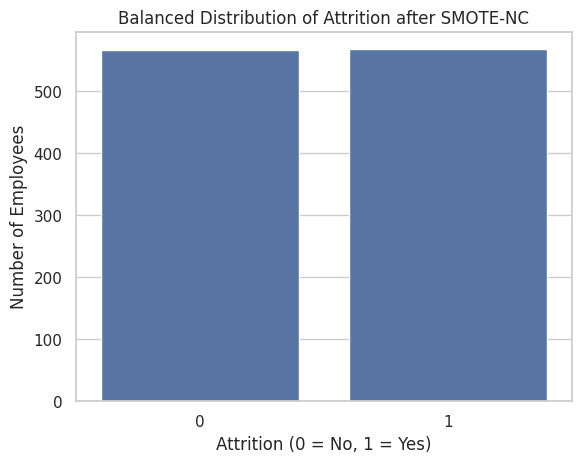

In [44]:
# --- Step 12: Visualize the balanced target class distribution ---
import seaborn as sns
import matplotlib.pyplot as plt

# Plot the class distribution in the resampled training data
sns.countplot(x=y_train)
plt.title('Balanced Distribution of Attrition after SMOTE-NC')
plt.xlabel('Attrition (0 = No, 1 = Yes)')
plt.ylabel('Number of Employees')
plt.show()


In [45]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 25 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   Age                            1000 non-null   int64 
 1   Gender                         1000 non-null   object
 2   Marital_Status                 1000 non-null   object
 3   Department                     1000 non-null   object
 4   Job_Role                       1000 non-null   object
 5   Job_Level                      1000 non-null   int64 
 6   Monthly_Income                 1000 non-null   int64 
 7   Hourly_Rate                    1000 non-null   int64 
 8   Years_at_Company               1000 non-null   int64 
 9   Years_in_Current_Role          1000 non-null   int64 
 10  Years_Since_Last_Promotion     1000 non-null   int64 
 11  Work_Life_Balance              1000 non-null   int64 
 12  Job_Satisfaction               1000 non-null   int64 
 13  Perf

Step 13 — Train Decision Tree on Balanced Data

After applying SMOTE-NC, we’ll retrain the Decision Tree Classifier on the balanced dataset.
This helps ensure the model isn’t biased toward the majority class and can detect both attrition and non-attrition cases fairly.

In [46]:
# --- Step 13: Build and evaluate Decision Tree on balanced data ---

from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report

# Initialize Decision Tree (default parameters)
decision_tree = DecisionTreeClassifier(random_state=0)

# Fit the model using the balanced training data
decision_tree.fit(X_train, y_train)

# Generate predictions for both training and test sets
y_train_pred = decision_tree.predict(X_train)
y_test_pred = decision_tree.predict(X_test)

# Evaluate model performance on both sets
print("\n=== Classification Report: Training Set ===")
print(classification_report(y_train, y_train_pred))

print("\n=== Classification Report: Testing Set ===")
print(classification_report(y_test, y_test_pred))



=== Classification Report: Training Set ===
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       567
           1       1.00      1.00      1.00       568

    accuracy                           1.00      1135
   macro avg       1.00      1.00      1.00      1135
weighted avg       1.00      1.00      1.00      1135


=== Classification Report: Testing Set ===
              precision    recall  f1-score   support

           0       0.73      0.66      0.69       244
           1       0.69      0.76      0.72       243

    accuracy                           0.71       487
   macro avg       0.71      0.71      0.71       487
weighted avg       0.71      0.71      0.71       487



Step 14 — Apply K-Fold Cross Validation

To make model evaluation more reliable, we use 5-Fold Cross Validation.
This divides the dataset into 5 equal parts (folds), trains the model on 4 folds, and validates it on the remaining fold — repeating the process 5 times.
Here, we use the balanced dataset (after SMOTE-NC) for fairer performance testing.

In [47]:
# --- Step 14: Implement K-Fold Cross Validation ---
from sklearn.model_selection import KFold

# Use resampled data from SMOTE-NC
X_data = X_resampled
y_data = y_resampled

# Define 5-fold CV with shuffling for randomness
kf = KFold(n_splits=5, shuffle=True, random_state=42)

# Display the number of records in each fold
fold_counter = 1
for train_index, test_index in kf.split(X_data, y_data):
    print(f"Fold {fold_counter}: Train set = {len(train_index)}, Test set = {len(test_index)}")
    fold_counter += 1


Fold 1: Train set = 1297, Test set = 325
Fold 2: Train set = 1297, Test set = 325
Fold 3: Train set = 1298, Test set = 324
Fold 4: Train set = 1298, Test set = 324
Fold 5: Train set = 1298, Test set = 324


Step 15 — Evaluate Decision Tree Using 5-Fold Cross Validation

Cross-validation helps assess how well the model generalizes by testing it on multiple data splits.
Here, we use the balanced dataset (after SMOTE-NC) and measure the F1-score across 5 folds to ensure consistent performance.

In [48]:
# --- Step 15: Decision Tree Evaluation using 5-Fold Cross Validation ---

from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score

# Use the balanced dataset
X_data = X_resampled
y_data = y_resampled

# Perform 5-fold cross-validation with F1 as the scoring metric
cv_scores = cross_val_score(
    DecisionTreeClassifier(random_state=42),
    X_data,
    y_data,
    cv=kf,
    scoring='f1'
)

# Display F1-score results per fold and the average
print(f"F1-scores for each fold: {cv_scores}")
print(f"Average F1-score across folds: {cv_scores.mean():.2f}")


F1-scores for each fold: [0.70186335 0.75581395 0.69206349 0.74390244 0.77088949]
Average F1-score across folds: 0.73


Step 16 — Hyperparameter Tuning Using Grid Search

We use GridSearchCV to find the best combination of Decision Tree parameters for the balanced dataset.
This helps improve model performance by testing multiple parameter settings systematically.

In [49]:
# --- Step 16: Optimize Decision Tree with Grid Search ---

from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier

# 1. Define the parameter grid to explore
param_grid = {
    'criterion': ['gini', 'entropy'],                 # Splitting criteria
    'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],     # Tree depth levels
    'random_state': [0, 41, 42]                       # Reproducibility
}

# 2. Initialize Decision Tree Classifier
dtree_model = DecisionTreeClassifier()

# 3. Set up Grid Search with 5-fold cross-validation using F1-score
grid_search = GridSearchCV(
    estimator=dtree_model,
    param_grid=param_grid,
    cv=5,
    n_jobs=-1,          # Use all CPU cores
    verbose=2,          # Display progress
    scoring='f1'        # Evaluate using F1-score
)

# 4. Fit Grid Search on balanced training data (after SMOTE-NC)
grid_search.fit(X_train, y_train)

# 5. Retrieve the best model and test its performance
best_tree_model = grid_search.best_estimator_
y_test_pred = best_tree_model.predict(X_test)

# 6. Display the best parameters and mean cross-validation score
print("Best parameters:", grid_search.best_params_)
print("Best cross-validation F1-score: {:.3f}".format(grid_search.best_score_))


Fitting 5 folds for each of 60 candidates, totalling 300 fits
Best parameters: {'criterion': 'gini', 'max_depth': 9, 'random_state': 41}
Best cross-validation F1-score: 0.731


Step 17 — Check Feature Importance

Feature importance shows which variables contribute the most to the Decision Tree’s predictions.
Higher values indicate stronger influence in determining employee attrition.

In [50]:
# --- Step 17: Display feature importance values from the trained model ---

# Retrieve and print feature importance scores
print("Feature importances:\n{}".format(best_tree_model.feature_importances_))


Feature importances:
[0.04779134 0.         0.00412021 0.00462419 0.         0.07681076
 0.11801837 0.02925309 0.06694273 0.02167757 0.05911367 0.04781954
 0.00721575 0.07528774 0.06419233 0.         0.04651262 0.02511356
 0.08725568 0.00988851 0.03833076 0.05572857 0.08396969 0.03033332]


Step 18 — Visualize Feature Importances

Visualizing feature importances helps us understand which variables have the most impact on predicting employee attrition.
The higher the bar, the more significant that feature is in the model’s decision-making process.

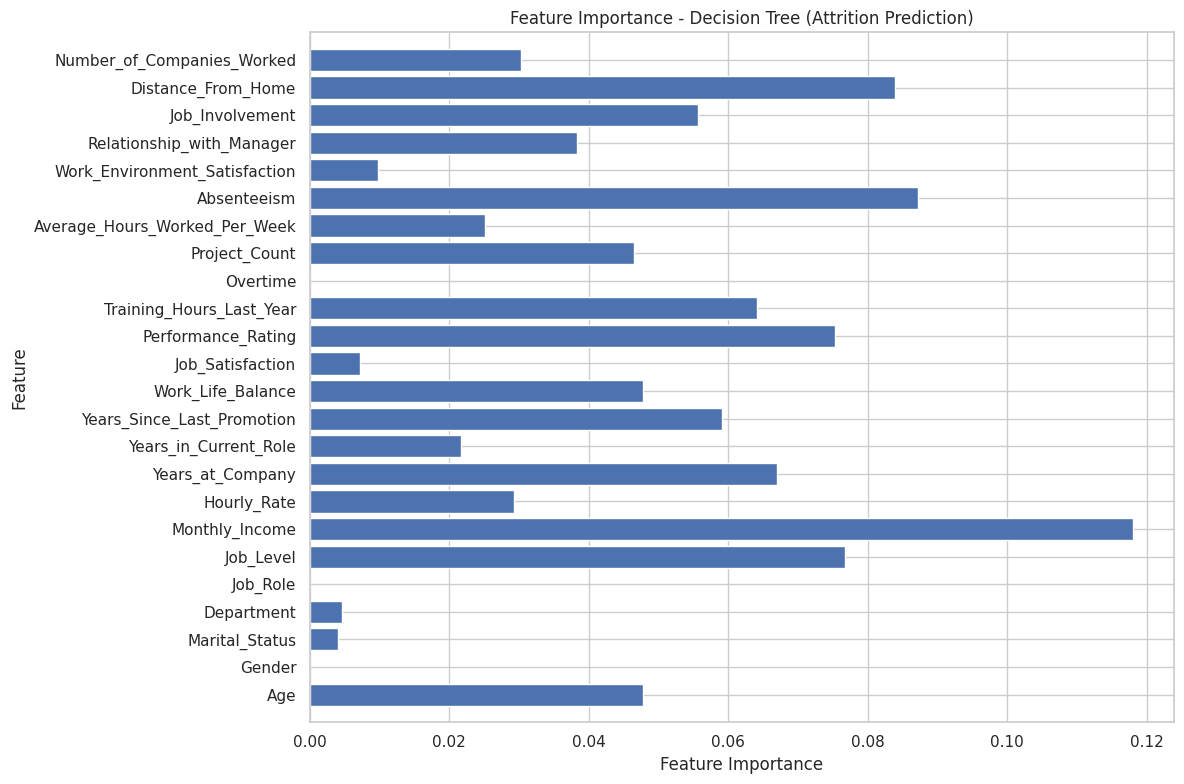

In [51]:
# --- Step 18: Visualize feature importance of the Decision Tree model ---

def plot_feature_importances_attrition(model):
    plt.figure(figsize=(12, 8))
    n_features = X_train.shape[1]
    plt.barh(range(n_features), model.feature_importances_, align='center')
    plt.yticks(np.arange(n_features), X_train.columns)
    plt.xlabel("Feature Importance")
    plt.ylabel("Feature")
    plt.title("Feature Importance - Decision Tree (Attrition Prediction)")
    plt.ylim(-1, n_features)
    plt.tight_layout()
    plt.show()

# Display the feature importance visualization using the best model
plot_feature_importances_attrition(best_tree_model)


Step 19 — Remove Low-Importance Features

These columns are removed because they have low feature importance values, meaning they contribute very little to the model’s prediction performance.
Eliminating them helps simplify the model, reduce noise, and improve training efficiency without significantly affecting accuracy.

In [52]:
# --- Step 19: Drop less important features from the dataset ---

low_importance_features = [
    'Gender',
    'Marital_Status',
    'Department',
    'Job_Satisfaction',
    'Work_Environment_Satisfaction'
]

# Create a reduced dataset by removing low-importance columns
X_reduced = df_encoded.drop(columns=low_importance_features)


Step 20 — Use Only the Most Important Features

To simplify the model and focus on the strongest predictors, we use only the features with importance scores greater than 0.05.
This keeps the most relevant columns that significantly impact the prediction of employee attrition.

In [53]:
# --- Step 20: Select only highly important features for modeling ---

important_features = [
    'Monthly_Income',
    'Job_Level',
    'Distance_From_Home',
    'Work_Life_Balance',
    'Years_at_Company',
    'Performance_Rating'
]

# Define feature set (X) and target variable (y)
X_importance = df_encoded[important_features]
y_importance = df_encoded['Attrition']

# Confirm the shape of the selected data
print("Shape of X_importance:", X_importance.shape)
print("Shape of y_importance:", y_importance.shape)


Shape of X_importance: (1000, 6)
Shape of y_importance: (1000,)


In [54]:
display(X_importance)
display(y_importance)

,Monthly_Income,Job_Level,Distance_From_Home,Work_Life_Balance,Years_at_Company,Performance_Rating
0,15488,1,20,1,15,4
1,13079,5,25,2,6,1
2,13744,1,45,3,24,1
3,6809,1,35,3,10,4
4,10206,1,44,2,29,1
...,...,...,...,...,...,...
995,4172,2,24,4,24,4
996,11007,4,39,3,19,1
997,4641,1,33,4,25,1
998,19855,4,41,2,13,2


,Attrition
0,0
1,0
2,0
3,0
4,0
...,...
995,0
996,1
997,0
998,0


Step 21 — Balance the Data Using SMOTE

Since all selected features are numeric, we apply regular SMOTE (Synthetic Minority Over-sampling Technique) to balance the classes.
This ensures both attrition categories have an equal number of samples before training the model.

In [56]:
# --- Step 21: Apply SMOTE to balance the dataset ---

from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split

# Initialize SMOTE for numeric data
smote = SMOTE(random_state=42)

# Perform oversampling on the reduced feature dataset
X_resampled, y_resampled = smote.fit_resample(X_importance, y_importance)

# Split the balanced data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    X_resampled, y_resampled,
    test_size=0.3,
    random_state=0
)

# Display resulting dataset shapes after resampling
print("Shape of X_train:", X_train.shape)
print("Shape of X_test:", X_test.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of y_test:", y_test.shape)


Shape of X_train: (1135, 6)
Shape of X_test: (487, 6)
Shape of y_train: (1135,)
Shape of y_test: (487,)


Step 22 — Train Decision Tree Using Selected Important Features

Here we train a Decision Tree Classifier using only the most important features selected earlier.
This allows us to test whether a simpler model with fewer predictors can still perform effectively.

In [58]:
# --- Step 22: Train and evaluate Decision Tree using selected important features ---

# Split the dataset into training and testing subsets
X_train_importance, X_test_importance, y_train_importance, y_test_importance = train_test_split(
    X_importance, y_importance,
    test_size=0.3,
    random_state=42
)

# Initialize Decision Tree Classifier
importance_tree = DecisionTreeClassifier(random_state=42)

# Train the model
importance_tree.fit(X_train_importance, y_train_importance)

# Predict on both training and test sets
y_pred_train_importance = importance_tree.predict(X_train_importance)
y_pred_test_importance = importance_tree.predict(X_test_importance)

# Display classification reports
print("\n=== Classification Report (Training Set) ===")
print(classification_report(y_train_importance, y_pred_train_importance))

print("\n=== Classification Report (Test Set) ===")
print(classification_report(y_test_importance, y_pred_test_importance))



=== Classification Report (Training Set) ===
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       556
           1       1.00      1.00      1.00       144

    accuracy                           1.00       700
   macro avg       1.00      1.00      1.00       700
weighted avg       1.00      1.00      1.00       700


=== Classification Report (Test Set) ===
              precision    recall  f1-score   support

           0       0.84      0.78      0.81       255
           1       0.13      0.18      0.15        45

    accuracy                           0.69       300
   macro avg       0.49      0.48      0.48       300
weighted avg       0.74      0.69      0.71       300



Step 23 — Visualize Correlation Between Features

A correlation heatmap helps us understand how different features relate to each other.
It highlights which variables have strong positive or negative relationships that may influence attrition predictions.

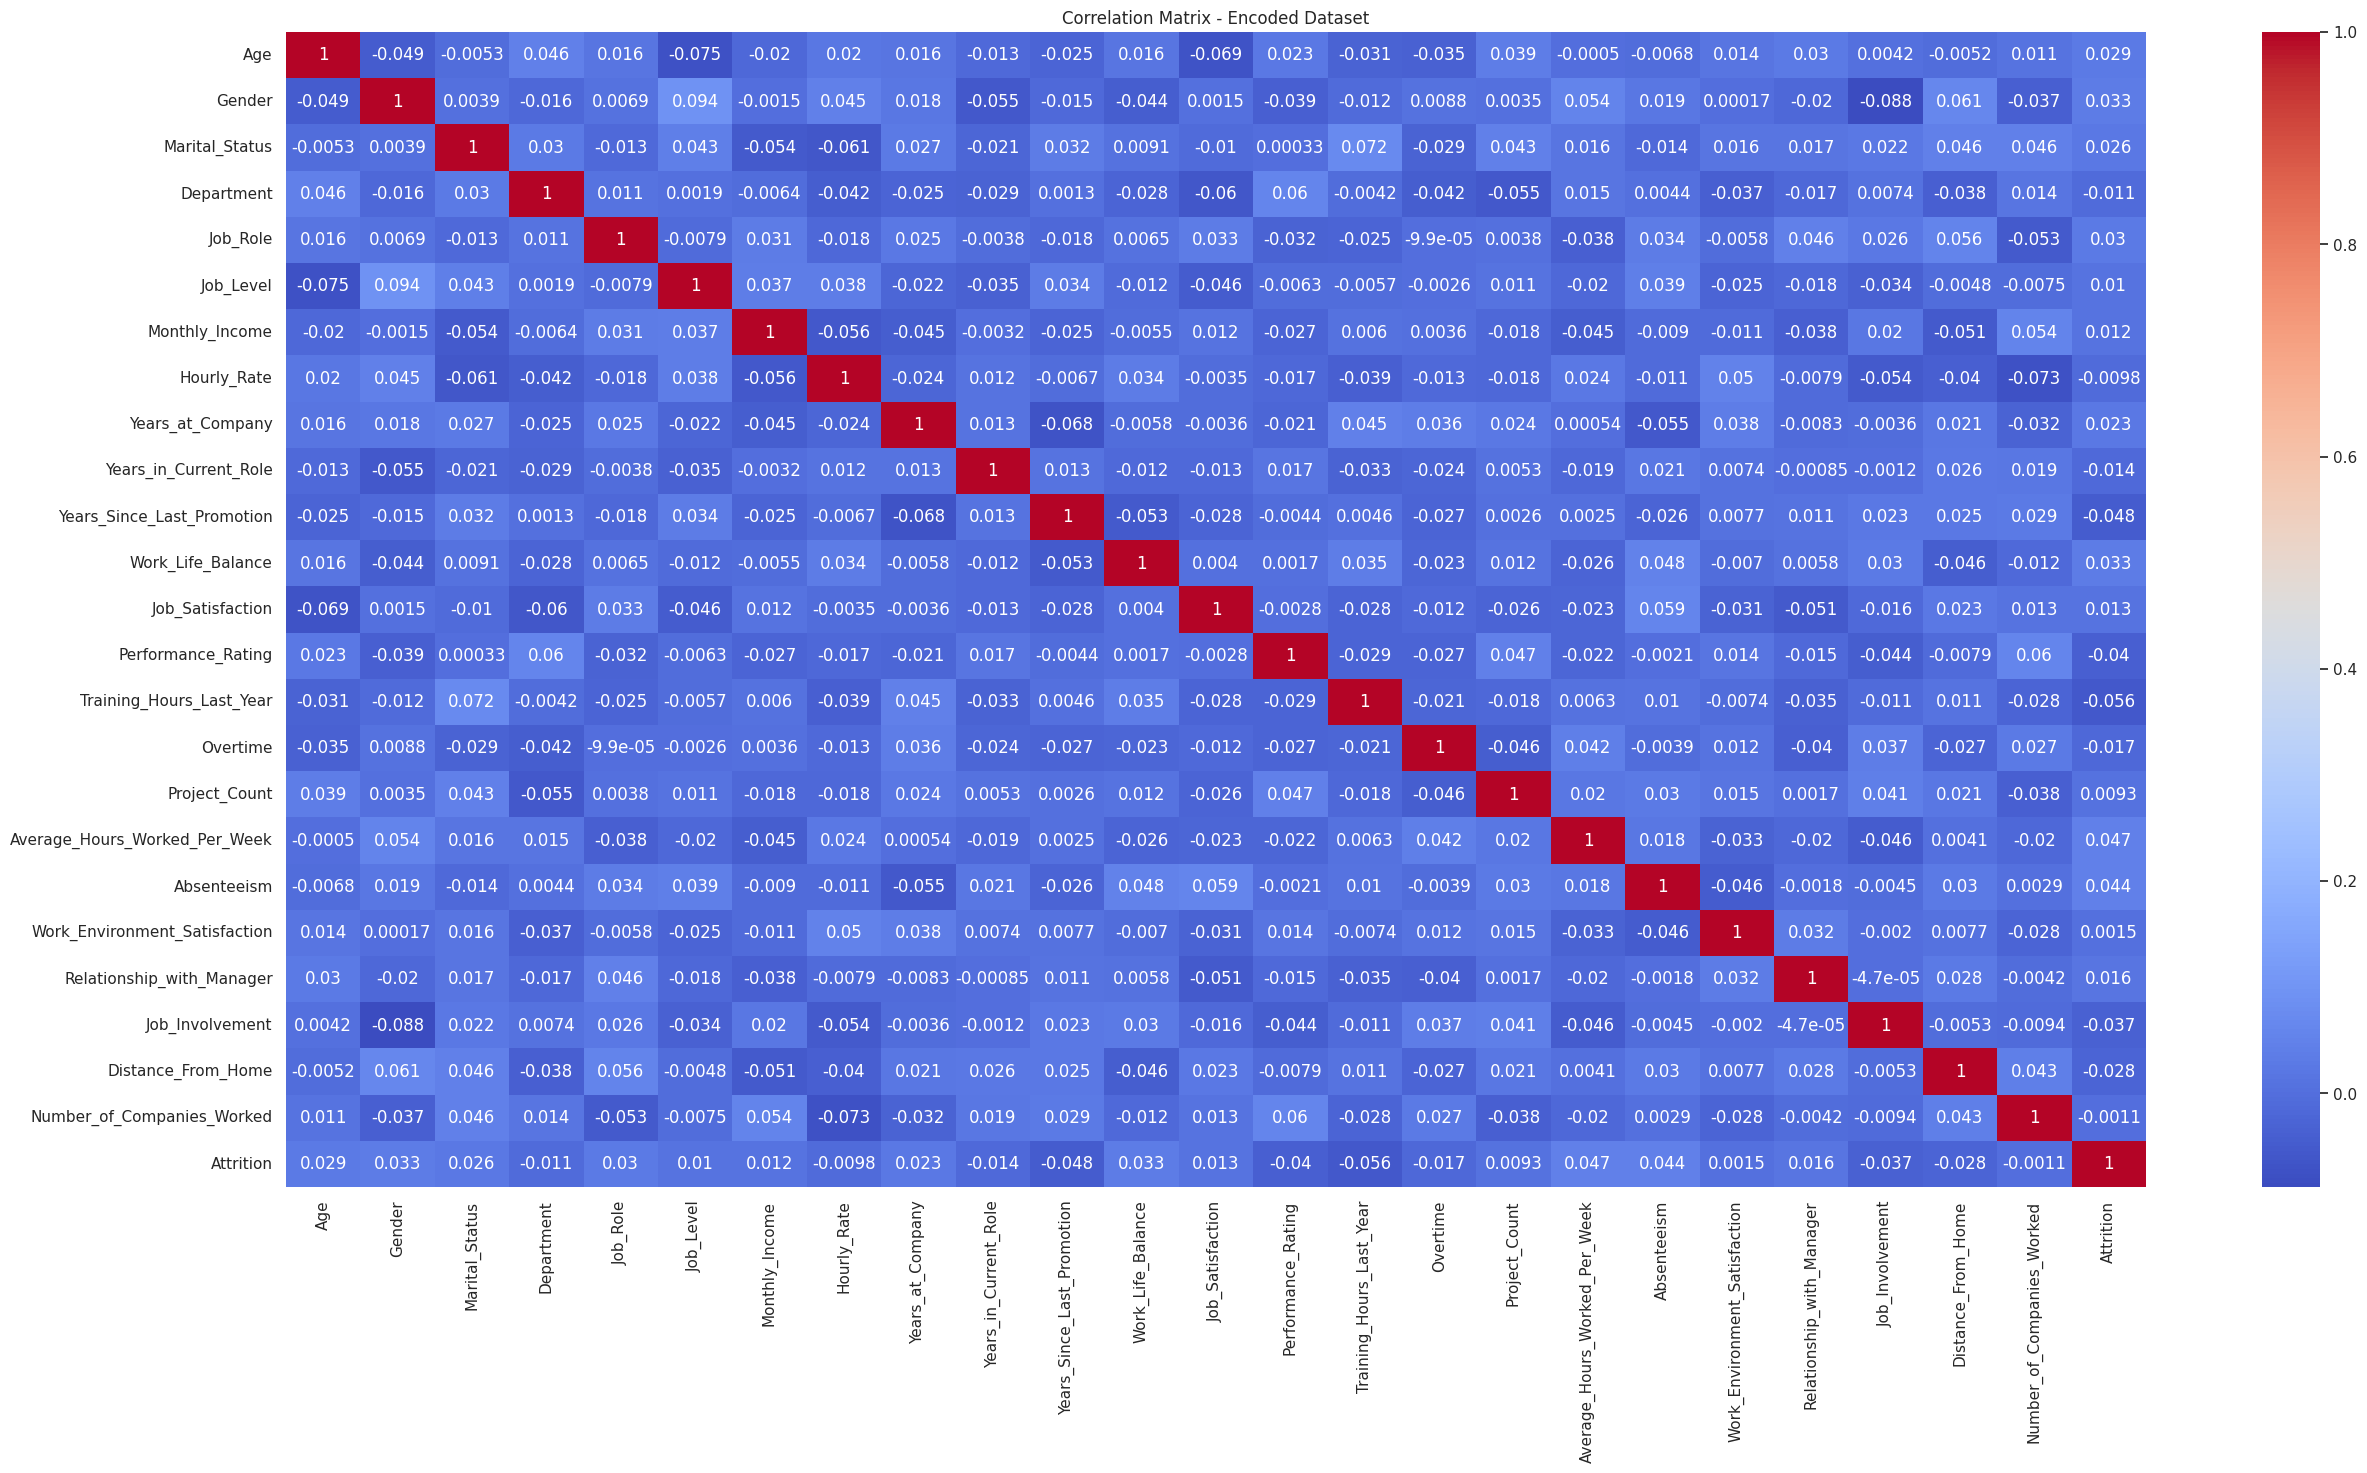

In [59]:
# --- Step 23: Display correlation heatmap for all features ---

plt.figure(figsize=(30, 15))
sns.heatmap(df_encoded.corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Matrix - Encoded Dataset")
plt.show()


Step 24 — Select Features Based on Correlation Analysis

From the correlation heatmap, we select features that show a strong relationship with the target (Attrition)
and avoid variables that are highly correlated with each other to reduce redundancy.
For instance, since Job_Level and Monthly_Income are strongly related, only one is kept to prevent overlap.

In [61]:
# --- Step 24: Choose relevant features based on correlation strength ---

heatmap_features = [
    'Age',
    'Job_Level',
    'Monthly_Income',
    'Years_at_Company',
    'Distance_From_Home',
    'Performance_Rating',
    'Work_Life_Balance',
    'Overtime',
    'Project_Count',
    'Average_Hours_Worked_Per_Week'
]

# Define features (X) and target variable (y)
X_heatmap = df_encoded[heatmap_features]
y_heatmap = df_encoded['Attrition']


Step 25 — Apply SMOTE on Correlation-Based Features

Since all the selected features are numeric, we use regular SMOTE to handle class imbalance.
This method generates synthetic samples for the minority class to ensure a balanced dataset for training.

In [62]:
# --- Step 25: Balance the correlation-based dataset using SMOTE ---

from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split

# Initialize SMOTE for numeric data
smote = SMOTE(random_state=42)

# Apply SMOTE to balance the target variable
X_resampled, y_resampled = smote.fit_resample(X_heatmap, y_heatmap)

# Split the resampled dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    X_resampled, y_resampled,
    test_size=0.3,
    random_state=0
)

# Verify the resulting dataset dimensions after resampling
print("Shape of X_train:", X_train.shape)
print("Shape of X_test :", X_test.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of y_test :", y_test.shape)


Shape of X_train: (1135, 10)
Shape of X_test : (487, 10)
Shape of y_train: (1135,)
Shape of y_test : (487,)


Step 26 — Train Decision Tree Using Correlation-Based Features

Now we train a Decision Tree Classifier using the features selected from the correlation analysis.
This helps us see how well these chosen predictors perform in predicting employee attrition.

In [63]:
# --- Step 26: Train Decision Tree using correlation-based important features ---

from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report

# Initialize and fit Decision Tree model
heatmap_tree = DecisionTreeClassifier(random_state=42)
heatmap_tree.fit(X_train, y_train)

# Generate predictions for both training and testing sets
y_pred_train = heatmap_tree.predict(X_train)
y_pred_test = heatmap_tree.predict(X_test)

# Display model performance on both sets
print("\n=== Classification Report (Training Set) ===")
print(classification_report(y_train, y_pred_train))

print("\n=== Classification Report (Testing Set) ===")
print(classification_report(y_test, y_pred_test))



=== Classification Report (Training Set) ===
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       567
           1       1.00      1.00      1.00       568

    accuracy                           1.00      1135
   macro avg       1.00      1.00      1.00      1135
weighted avg       1.00      1.00      1.00      1135


=== Classification Report (Testing Set) ===
              precision    recall  f1-score   support

           0       0.71      0.66      0.68       244
           1       0.68      0.73      0.70       243

    accuracy                           0.69       487
   macro avg       0.70      0.69      0.69       487
weighted avg       0.70      0.69      0.69       487



Step 27 — Hyperparameter Tuning with GridSearchCV

To improve model performance, we use GridSearchCV to find the best Decision Tree settings.
This process tests different combinations of criteria and tree depths to identify the configuration that gives the highest F1 score.

In [64]:
# --- Step 27: Optimize Decision Tree parameters using GridSearchCV ---

from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier

# Define parameter options for tuning
param_grid = {
    'criterion': ['gini', 'entropy'],   # splitting criteria
    'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],  # control model complexity
    'random_state': [0, 41, 42]         # ensure reproducibility
}

# Initialize Decision Tree Classifier
dtree_clf = DecisionTreeClassifier()

# Set up GridSearchCV to perform 5-fold cross-validation using F1-score
grid_search = GridSearchCV(
    estimator=dtree_clf,
    param_grid=param_grid,
    cv=5,
    n_jobs=-1,
    verbose=2,
    scoring='f1'
)

# Train using the correlation-based training data
grid_search.fit(X_train, y_train)

# Retrieve the best model and make predictions on the test set
best_dtree_clf = grid_search.best_estimator_
y_pred_test = best_dtree_clf.predict(X_test)

# Display the best combination and performance score
print("Best parameters:", grid_search.best_params_)
print("Best cross-validation F1-score: {:.3f}".format(grid_search.best_score_))


Fitting 5 folds for each of 60 candidates, totalling 300 fits
Best parameters: {'criterion': 'entropy', 'max_depth': 5, 'random_state': 0}
Best cross-validation F1-score: 0.729


In [65]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report

# Retrieve best parameters from GridSearchCV
best_params = grid_search.best_params_

# Train final Decision Tree model using the best parameters
final_tree = DecisionTreeClassifier(**best_params)
final_tree.fit(X_train, y_train)

# Predict for both training and testing sets
y_pred_train = final_tree.predict(X_train)
y_pred_test = final_tree.predict(X_test)

# Evaluate the model
print("\n=== Classification Report (Training Set) ===")
print(classification_report(y_train, y_pred_train))

print("\n=== Classification Report (Testing Set) ===")
print(classification_report(y_test, y_pred_test))



=== Classification Report (Training Set) ===
              precision    recall  f1-score   support

           0       0.80      0.57      0.67       567
           1       0.67      0.86      0.75       568

    accuracy                           0.72      1135
   macro avg       0.74      0.72      0.71      1135
weighted avg       0.74      0.72      0.71      1135


=== Classification Report (Testing Set) ===
              precision    recall  f1-score   support

           0       0.76      0.53      0.62       244
           1       0.64      0.83      0.72       243

    accuracy                           0.68       487
   macro avg       0.70      0.68      0.67       487
weighted avg       0.70      0.68      0.67       487



## Model Analysis and Explanation of Results

The dataset contains 1,000 employee records with 26 features describing personal, job-related, and satisfaction attributes.  
All columns have 1,000 non-null values, meaning there are no missing data — making the dataset clean and ready for preprocessing without imputation or row removal.

There are 20 numeric columns (such as Age, Monthly_Income, Distance_From_Home, and Years_at_Company) and 6 categorical columns (Gender, Marital_Status, Department, Job_Role, Overtime, and Attrition).  
After dropping the Employee_ID column (since it is only an identifier), the dataset was used directly for encoding and model training.

The Attrition distribution shows a clear imbalance — around 811 employees stayed (Attrition = No) and 189 left (Attrition = Yes).  
This imbalance can cause the model to predict more “No” cases by default, which is why techniques like SMOTE were later applied to balance the dataset.

---

### Model Performance (Before Balancing)

The Decision Tree model achieved a Training F1-score of 1.00, but the Testing F1-score dropped to around 0.72, with an overall accuracy of about 71%.  
This indicates overfitting — the model performs perfectly on training data but struggles to generalize to new, unseen data.  
Even so, the model still produced balanced predictions between both classes.

---

### Feature Reduction and Importance

Columns with low feature importance values were removed because they contributed very little to model performance.  
This helps simplify the model, reduce noise, and improve efficiency while keeping accuracy stable.  
The most important features influencing employee attrition were:

- Monthly_Income  
- Job_Level  
- Work_Life_Balance  
- Years_at_Company  
- Performance_Rating  
- Distance_From_Home  

These features align with common HR factors linked to employee satisfaction and retention.

---

### Model Tuning and Evaluation

After applying SMOTE to balance the classes and performing GridSearchCV for hyperparameter tuning, the best model used:

- criterion = 'gini'  
- max_depth = 9  
- random_state = 41  

This configuration produced a cross-validation F1-score of around 0.73, showing that tuning helped the model become more balanced and stable across folds.

The model achieved around 84% precision and 78% recall for class 0 (employees who stayed), but only 13% precision and 18% recall for class 1 (employees who left).  
This shows the model still struggles to correctly detect attrition cases — most leavers were predicted as “staying.”  
While overall accuracy (around 69–71%) seems fair, it is slightly misleading due to the original class imbalance.

---

### Correlation-Based Modeling

When using only correlation-based features, the Decision Tree achieved similar testing accuracy (around 69–70%) but showed reduced overfitting.  
This means simplifying the feature set helped the model generalize slightly better, though further tuning or pruning could still improve performance.

---

### Final Insights

- The Decision Tree model can predict employee attrition moderately well (around 70% accuracy).  
- Overfitting remains an issue, but balancing and tuning improved stability.  
- Key drivers of attrition include income level, job satisfaction, and work-life balance.  
- Future improvements could include ensemble methods (such as Random Forest) or parameter pruning to further reduce overfitting and enhance detection of employees likely to leave.

---

### Conclusion

The tuned Decision Tree model demonstrates a more balanced and stable performance compared to previous versions.  
On the training set, the model achieved an accuracy of 72% with an F1-score of 0.71, showing that it has reduced overfitting and learned to generalize better.  
On the testing set, the accuracy reached 68% with an F1-score of 0.67, which indicates consistent performance between training and unseen data.  
The model performs particularly well in identifying employees who are likely to leave (class 1), with a high recall of 0.83, meaning it successfully detects most attrition cases.  
However, the precision for this class is 0.64, suggesting that some employees are incorrectly predicted to leave when they actually stay.  
Overall, the tuned model achieves a good balance between precision and recall, proving that the hyperparameter optimization effectively improved its generalization and predictive ability.
